## Packages

In [1]:
import matplotlib.pyplot as plt
from networkx import nx
import numpy as np
import scipy
import math
from random import randint

## Part 1.1

C:\Users\danie\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


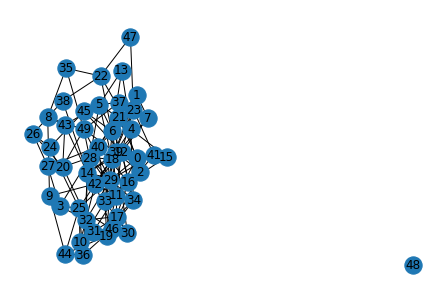

In [2]:
# Generate p-ER random graph
Gp = nx.erdos_renyi_graph(50,0.1) 
nx.draw(Gp, with_labels=True) 
plt.show() 

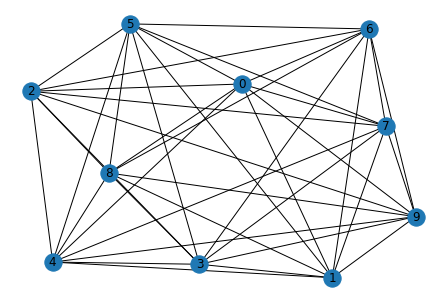

In [3]:
# Generate r-regular random graph
Gr = nx.random_regular_graph(8, 10)
nx.draw(Gr, with_labels=True)
plt.show()

## Part 1.2

In [14]:
# Algebraic method 1 (irreducibility)
def method1(G):
    adj=nx.to_numpy_matrix(G)
    k=len(adj)
    check=np.identity(k)
    for i in range(1,k):
        check+=np.power(adj,i)
    if (check>0).all():
        print('The graph is conncted')
    else:
        print('The graph is not connected')
method1(Gp)

The graph is not connected


In [5]:
# Algebraic method 2 (eigenvalue of the Laplacian matrix)
def method2(G):
    L = nx.laplacian_matrix(G)
    # Convert scipy matrix to numpy array
    L = scipy.sparse.csr_matrix.toarray(L)
    eigv = np.linalg.eigvals(L)
    # Check
    return (np.sort(eigv)[1]>0)
method2(Gp)

False

In [6]:
# Breadth-frst search algorithm
def BFS(G):
    # Make a list of all the nodes connected to the staring one in a BFS way.
    l = list(nx.bfs_edges(G, randint(0,len(G)-1)))
    # If l contains all nodes it must have the length of G-1 (the node isn't connected to itself)
    if len(l) == len(G)-1:
        return True
    else:
        return False
BFS(Gp)

False

## Part 1.3

In [18]:
run_m1_ER=[]
run_m2_ER=[]
run_m3_ER=[]

In [19]:
import time
status=100
for k in range(100,2000,100):
    p_ER=nx.erdos_renyi_graph(k,0.5)
    start_time = time.time()
    method1(p_ER)
    run_m1_ER+=[time.time() - start_time]
    status+=100
    if status%10==0:
        print(status)

The graph is not connected
200
The graph is not connected
300
The graph is not connected
400
The graph is not connected
500
The graph is not connected
600
The graph is not connected
700
The graph is not connected
800
The graph is not connected
900
The graph is not connected
1000
The graph is not connected
1100
The graph is not connected
1200
The graph is not connected
1300
The graph is not connected
1400
The graph is not connected
1500
The graph is not connected
1600
The graph is not connected
1700
The graph is not connected
1800
The graph is not connected
1900
The graph is not connected
2000


In [20]:
status=100
for k in range(100,2000,100):
    p_ER=nx.erdos_renyi_graph(k,0.5)
    start_time = time.time()
    method2(p_ER)
    run_m2_ER+=[time.time() - start_time]
    status+=100
    if status%10==0:
        print(status)

200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000


In [22]:
status=100
for k in range(100,2000,100):
    p_ER=nx.erdos_renyi_graph(k,0.5)
    start_time = time.time()
    BFS(p_ER)
    run_m3_ER+=[time.time() - start_time]
    status+=100
    if status%10==0:
        print(status)

200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000


Text(0, 0.5, 'run-time in seconds')

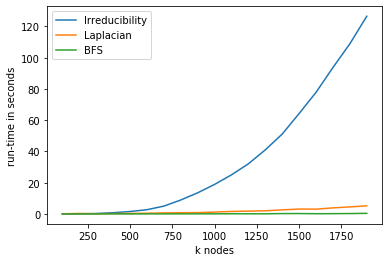

In [39]:
## plotting...
# first of all let's define the number of nodes
nodes=[i for i in range(100,2000,100)]
plt.plot(nodes,run_m1_ER,label='Irreducibility')
plt.plot(nodes,run_m2_ER,label='Laplacian')
plt.plot(nodes,run_m3_ER,label='BFS')
plt.legend(loc="upper left")
plt.xlabel('k nodes')
plt.ylabel('run-time in seconds')

## Part 1.4